<a href="https://colab.research.google.com/github/martabarbosa1/Hackathon--aws/blob/main/EDA/M_Hackaton_RealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#data dowloaded from https://files.data.gouv.fr/geo-dvf/latest/csv/2020/full.csv.gz

In [2]:
# df_16_17 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_16_17.csv')
# df_18_19 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_18_19.csv')
# df_2017 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/idf_transactions_2017.csv')
# df_pop_dem = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/info_pop_dem_communes_idf.csv', sep=';')
# df_log = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/logements_info_75.csv')
# df_14_15 = pd.read_csv('https://raw.githubusercontent.com/Gierko/Hackathon-11th-to-13th-January/main/transactions_idf_14_15.csv')

In [10]:
t =  pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2022/full.csv.gz')
df2022 = t[['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','code_commune','code_departement','id_parcelle','longitude','latitude','date_mutation']] 
df2022

<ipython-input-10-aeb20a31db6d>:1: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  t =  pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2022/full.csv.gz')


,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
0,2022-1,55000.0,24.0,1.0,Appartement,Vente,Bourg-en-Bresse,1053,1,01053000AM0102,5.218706,46.198054,2022-01-03
1,2022-2,143000.0,NaN,NaN,NaN,Vente,Savigneux,1398,1,01398000ZE0184,4.847867,46.000617,2022-01-03
2,2022-2,143000.0,NaN,NaN,NaN,Vente,Savigneux,1398,1,01398000ZE0185,4.847920,46.000576,2022-01-03
3,2022-2,143000.0,140.0,3.0,Appartement,Vente,Savigneux,1398,1,01398000ZE0187,4.848345,46.000585,2022-01-03
4,2022-3,300.0,NaN,NaN,NaN,Vente,Messimy-sur-Saône,1243,1,012430000A0643,4.747627,46.045434,2022-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429088,2022-537271,423000.0,NaN,0.0,Dépendance,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21
1429089,2022-537271,423000.0,NaN,0.0,Dépendance,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21
1429090,2022-537272,104650.0,15.0,1.0,Appartement,Vente,Paris 11e Arrondissement,75111,75,75111000BS0234,2.386354,48.856079,2022-06-30
1429091,2022-537273,51000.0,NaN,0.0,Dépendance,Adjudication,Paris 16e Arrondissement,75116,75,75116000BY0016,2.271505,48.849026,2022-02-10


In [11]:
type(df2022['code_departement'][0])

int

In [12]:
#filter only the departments in ile de france
list_departments = [75, 77, 78, 91, 92, 93, 94, 95]
df2022 = df2022[df2022['code_departement'].isin(list_departments)]

In [6]:
df2022.columns

Index(['id_mutation', 'valeur_fonciere', 'surface_reelle_bati',
       'nombre_pieces_principales', 'type_local', 'nature_mutation',
       'nom_commune', 'code_commune', 'code_departement', 'id_parcelle',
       'longitude', 'latitude', 'date_mutation'],
      dtype='object')

In [7]:
#check if we keep the column nature_mutation
df2022['nature_mutation'].value_counts()

Vente                                 220785
Vente en l'état futur d'achèvement     26362
Echange                                  766
Vente terrain à bâtir                    386
Adjudication                             182
Expropriation                              3
Name: nature_mutation, dtype: int64

<AxesSubplot: ylabel='nature_mutation'>

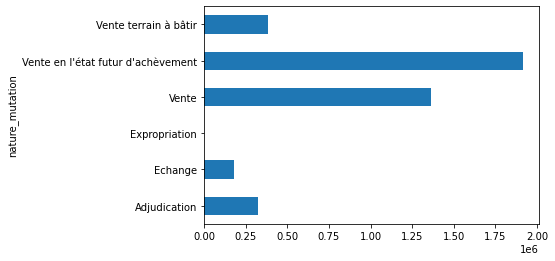

In [8]:
#do the price variie according with nature_mutation?
df2022.groupby(df2022['nature_mutation'])['valeur_fonciere'].mean().plot(kind='barh')
#yes, there is a clear difference

In [8]:
x = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2020/full.csv.gz')
df2020 = x[['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','code_commune','code_departement','id_parcelle','longitude','latitude','date_mutation']] 
df2020

<ipython-input-8-bd99bca09c6b>:1: DtypeWarning: Columns (10,12,14,16,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  x = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2020/full.csv.gz')


,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
0,2020-1,8000.0,NaN,NaN,NaN,Vente,Ceyzériat,1072,1,01072000AK0216,5.323522,46.171899,2020-01-07
1,2020-2,2175.0,NaN,NaN,NaN,Vente,Laiz,1203,1,012030000B0004,4.893447,46.251861,2020-01-02
2,2020-2,2175.0,NaN,NaN,NaN,Vente,Laiz,1203,1,012030000B0173,4.900028,46.235305,2020-01-02
3,2020-2,2175.0,NaN,NaN,NaN,Vente,Laiz,1203,1,012030000B0477,4.882230,46.246538,2020-01-02
4,2020-2,2175.0,NaN,NaN,NaN,Vente,Laiz,1203,1,012030000C0068,4.894481,46.251841,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509080,2020-1462189,1937500.0,29.0,2.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AW0019,2.350486,48.854301,2020-12-16
3509081,2020-1462189,1937500.0,40.0,2.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AW0019,2.350486,48.854301,2020-12-16
3509082,2020-1462189,1937500.0,24.0,1.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AW0019,2.350486,48.854301,2020-12-16
3509083,2020-1462189,1937500.0,40.0,2.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AW0019,2.350486,48.854301,2020-12-16


In [9]:
#filter only the departments in ile de france
list_departments = [75, 77, 78, 91, 92, 93, 94, 95]
df2020 = df2020[df2020['code_departement'].isin(list_departments)]

In [6]:
z = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2019/full.csv.gz')
df2019 = z[['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','code_commune','code_departement','id_parcelle','longitude','latitude','date_mutation']] 
df2019

<ipython-input-6-7318731a31d5>:1: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  z = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2019/full.csv.gz')


,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
0,2019-1,37220.0,20.0,1.0,Appartement,Vente,Bourg-en-Bresse,1053,1,01053000AI0298,5.209562,46.198840,2019-01-04
1,2019-2,185100.0,NaN,0.0,Dépendance,Vente,Bourg-en-Bresse,1053,1,01053000AM0095,5.219396,46.198766,2019-01-04
2,2019-2,185100.0,62.0,3.0,Appartement,Vente,Bourg-en-Bresse,1053,1,01053000AM0095,5.219396,46.198766,2019-01-04
3,2019-3,209000.0,90.0,4.0,Maison,Vente,Priay,1314,1,013140000E1676,5.282104,45.999566,2019-01-08
4,2019-4,134900.0,101.0,5.0,Maison,Vente,Saint-Étienne-du-Bois,1350,1,01350000AA0011,5.299929,46.293278,2019-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623952,2019-1548066,1400000.0,97.0,3.0,Appartement,Vente,Paris 2e Arrondissement,75102,75,75102000AM0018,2.348095,48.866431,2019-12-30
3623953,2019-1548067,620000.0,45.0,2.0,Appartement,Adjudication,Paris 4e Arrondissement,75104,75,75104000AM0014,2.360708,48.856187,2019-12-17
3623954,2019-1548068,370000.0,47.0,0.0,Local industriel. commercial ou assimilé,Vente,Paris 2e Arrondissement,75102,75,75102000AH0067,2.347484,48.869730,2019-12-05
3623955,2019-1548069,44000.0,NaN,0.0,Dépendance,Adjudication,Paris 2e Arrondissement,75102,75,75102000AJ0127,2.341263,48.866494,2019-12-12


In [7]:
list_departments = [75, 77, 78, 91, 92, 93, 94, 95]
df2019 = df2019[df2019['code_departement'].isin(list_departments)]

In [4]:
a = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2021/full.csv.gz')
df2021 = a[['id_mutation','valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','type_local','nature_mutation','nom_commune','code_commune','code_departement','id_parcelle','longitude','latitude','date_mutation']] 
df2021

<ipython-input-4-b8ccb59d1261>:1: DtypeWarning: Columns (10,12,14,17,18,20,22,24,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv('https://files.data.gouv.fr/geo-dvf/latest/csv/2021/full.csv.gz')


,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
0,2021-1,185000.0,97.0,5.0,Maison,Vente,Val-Revermont,1426,1,01426312ZC0122,5.386094,46.327140,2021-01-05
1,2021-1,185000.0,NaN,0.0,Dépendance,Vente,Val-Revermont,1426,1,01426312ZC0122,5.386094,46.327140,2021-01-05
2,2021-2,10.0,NaN,NaN,NaN,Vente,Bey,1042,1,010420000A0204,4.844368,46.224233,2021-01-06
3,2021-3,204332.0,88.0,4.0,Maison,Vente,Buellas,1065,1,010650000B1325,5.157688,46.200988,2021-01-04
4,2021-4,320000.0,NaN,0.0,Dépendance,Vente,Montagnat,1254,1,01254000AZ0011,5.273260,46.156334,2021-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375218,2021-1624386,383000.0,30.0,2.0,Appartement,Vente,Paris 4e Arrondissement,75104,75,75104000AO0117,2.367712,48.854200,2021-03-12
4375219,2021-1624387,260000.0,37.0,2.0,Appartement,Vente,Paris 2e Arrondissement,75102,75,75102000AP0128,2.350774,48.868450,2021-03-17
4375220,2021-1624388,38000.0,NaN,0.0,Dépendance,Vente,Paris 4e Arrondissement,75104,75,75104000AH0068,2.357623,48.858041,2021-03-19
4375221,2021-1624389,38000.0,NaN,0.0,Dépendance,Vente,Paris 4e Arrondissement,75104,75,75104000AP0005,2.365430,48.852861,2021-03-30


In [13]:
list_departments = [75, 77, 78, 91, 92, 93, 94, 95]
df2021 = df2021[df2021['code_departement'].isin(list_departments)]

In [22]:
df_all = pd.concat([df2019, df2020, df2021, df2022])

In [23]:
df_all

,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
2728836,2019-1137255,310000.0,101.0,4.0,Maison,Vente,Gretz-Armainvilliers,77215,77,772150000B0473,2.740574,48.739669,2019-01-03
2728837,2019-1137255,310000.0,NaN,NaN,NaN,Vente,Gretz-Armainvilliers,77215,77,772150000B0474,2.741131,48.739847,2019-01-03
2728838,2019-1137256,150000.0,72.0,3.0,Maison,Vente,Saint-Fargeau-Ponthierry,77407,77,77407000AD0345,2.539824,48.563586,2019-01-03
2728839,2019-1137256,150000.0,72.0,3.0,Maison,Vente,Saint-Fargeau-Ponthierry,77407,77,77407000AD0345,2.539824,48.563586,2019-01-03
2728840,2019-1137257,250000.0,44.0,0.0,Local industriel. commercial ou assimilé,Vente,Melun,77288,77,77288000AV0266,2.656724,48.534489,2019-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429088,2022-537271,423000.0,NaN,0.0,Dépendance,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21
1429089,2022-537271,423000.0,NaN,0.0,Dépendance,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21
1429090,2022-537272,104650.0,15.0,1.0,Appartement,Vente,Paris 11e Arrondissement,75111,75,75111000BS0234,2.386354,48.856079,2022-06-30
1429091,2022-537273,51000.0,NaN,0.0,Dépendance,Adjudication,Paris 16e Arrondissement,75116,75,75116000BY0016,2.271505,48.849026,2022-02-10


##Clean the Nans

In [16]:
# df_all = pd.read_csv('/content/drive/MyDrive/Wild Code School/Datathon - Real Estate and AWS/df_final.csv', compression = 'zip')

In [24]:
list_columns = df_all.columns.to_list()

In [73]:
def check_nans(col):
  return ((df_all[col].isna().sum())/df_all.shape[0])*100, col
  # print('The column', col, 'has', df_all['col'].isna(), 'null values')

list(map(check_nans, list_columns))

[(0.0, 'id_mutation'),
 (1.2291865682274161, 'valeur_fonciere'),
 (51.86809965689515, 'surface_reelle_bati'),
 (21.267946439206913, 'nombre_pieces_principales'),
 (21.22602178213659, 'type_local'),
 (0.0, 'nature_mutation'),
 (0.0, 'nom_commune'),
 (0.0, 'code_commune'),
 (0.0, 'code_departement'),
 (0.0, 'id_parcelle'),
 (1.2720454794942881, 'longitude'),
 (1.2720454794942881, 'latitude'),
 (0.0, 'date_mutation')]

In [74]:
df_final = df_all.dropna(subset=['surface_reelle_bati', 'nombre_pieces_principales', 'type_local'])
df_final

,id_mutation,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local,nature_mutation,nom_commune,code_commune,code_departement,id_parcelle,longitude,latitude,date_mutation
2728836,2019-1137255,310000.0,101.0,4.0,Maison,Vente,Gretz-Armainvilliers,77215,77,772150000B0473,2.740574,48.739669,2019-01-03
2728838,2019-1137256,150000.0,72.0,3.0,Maison,Vente,Saint-Fargeau-Ponthierry,77407,77,77407000AD0345,2.539824,48.563586,2019-01-03
2728839,2019-1137256,150000.0,72.0,3.0,Maison,Vente,Saint-Fargeau-Ponthierry,77407,77,77407000AD0345,2.539824,48.563586,2019-01-03
2728840,2019-1137257,250000.0,44.0,0.0,Local industriel. commercial ou assimilé,Vente,Melun,77288,77,77288000AV0266,2.656724,48.534489,2019-01-09
2728842,2019-1137258,155000.0,51.0,2.0,Appartement,Vente,Pontault-Combault,77373,77,77373000AD0157,2.616840,48.805639,2019-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429084,2022-537268,1905000.0,160.0,6.0,Appartement,Adjudication,Paris 15e Arrondissement,75115,75,75115000CW0050,2.310843,48.845591,2022-04-14
1429085,2022-537269,270000.0,51.0,0.0,Local industriel. commercial ou assimilé,Vente,Paris 11e Arrondissement,75111,75,75111000CN0034,2.397491,48.850253,2022-06-10
1429086,2022-537270,1326666.6,281.0,0.0,Local industriel. commercial ou assimilé,Vente,Paris 14e Arrondissement,75114,75,75114000CQ0137,2.318175,48.832970,2022-06-16
1429087,2022-537271,423000.0,43.0,2.0,Appartement,Vente,Paris 15e Arrondissement,75115,75,75115000AC0055,2.305379,48.837454,2022-06-21


In [75]:
def check_nans(col):
  return ((df_final[col].isna().sum())/df_final.shape[0])*100, col
  # print('The column', col, 'has', df_all['col'].isna(), 'null values')

list(map(check_nans, list_columns))

[(0.0, 'id_mutation'),
 (0.8818337872510782, 'valeur_fonciere'),
 (0.0, 'surface_reelle_bati'),
 (0.0, 'nombre_pieces_principales'),
 (0.0, 'type_local'),
 (0.0, 'nature_mutation'),
 (0.0, 'nom_commune'),
 (0.0, 'code_commune'),
 (0.0, 'code_departement'),
 (0.0, 'id_parcelle'),
 (0.9904101030565142, 'longitude'),
 (0.9904101030565142, 'latitude'),
 (0.0, 'date_mutation')]

In [76]:
#chck if the distribution of the neighborhood changes after drop
print('before', df_all['nom_commune'].value_counts(normalize = True))
print('\nafter', df_final['nom_commune'].value_counts(normalize = True))

#it doesnt

before Paris 15e Arrondissement    1.592903e-02
Paris 16e Arrondissement    1.497785e-02
Paris 18e Arrondissement    1.402024e-02
Paris 17e Arrondissement    1.251083e-02
Paris 11e Arrondissement    1.059444e-02
                                ...     
Vaudherland                 2.919544e-06
Theuville                   2.335635e-06
Gambaiseuil                 1.751727e-06
Châtenay-en-France          1.167818e-06
Sigy                        5.839089e-07
Name: nom_commune, Length: 1283, dtype: float64

after Paris 15e Arrondissement    0.019584
Paris 18e Arrondissement    0.019540
Paris 17e Arrondissement    0.016704
Paris 16e Arrondissement    0.016163
Paris 11e Arrondissement    0.015219
                              ...   
Vaudherland                 0.000004
Gambaiseuil                 0.000004
Le Tartre-Gaudran           0.000004
Theuville                   0.000001
Châtenay-en-France          0.000001
Name: nom_commune, Length: 1281, dtype: float64


In [30]:
# create a csv
# df_final.to_csv('df_final.csv', index=False,
#           compression= 'zip')

#ML for prediction of prices

##1) EDA on Price

In [4]:
df_final = pd.read_csv('/content/drive/MyDrive/Wild Code School/Datathon - Real Estate and AWS/df_final.csv', compression = 'zip')

In [33]:
#Check the time series
type(df_final['date_mutation'][0])

str

In [34]:
#first convert to datetime
df_final['date_mutation'] = pd.to_datetime(df_final['date_mutation'])

In [35]:
type(df_final['date_mutation'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_final['nom_commune'].value_counts() # 1245 neighboorhoods

In [ ]:
df_final['nature_mutation'].value_counts() #Vente, Vente en...

In [5]:
#create a condition: only apartments that were sold
df_vente_ap = df_final[(df_final['nature_mutation'] == 'Vente') & (df_final['type_local'] == 'Appartement')]

#create a pivot table for the values mean in terms of date and department
pivot_table = df_vente_ap.pivot_table(values = 'valeur_fonciere', index = ['date_mutation', 'code_departement'], aggfunc = ['mean', 'std'])

In [6]:
pivot_table.reset_index(inplace = True)
pivot_table


,date_mutation,code_departement,mean,std
,,,valeur_fonciere,valeur_fonciere
0,2019-01-02,75,4.329888e+05,3.401867e+05
1,2019-01-02,77,1.861208e+05,8.576228e+04
2,2019-01-02,78,2.139786e+05,1.552223e+05
3,2019-01-02,91,1.384500e+05,6.443621e+04
4,2019-01-02,92,2.752500e+05,1.076831e+05
...,...,...,...,...
8320,2022-06-30,91,2.804936e+05,2.043856e+05
8321,2022-06-30,92,1.200905e+06,1.761114e+06
8322,2022-06-30,93,3.000884e+05,2.181045e+05


In [7]:
pivot_table.columns = pivot_table.columns.droplevel(1)

In [8]:
pivot_table.columns

Index(['date_mutation', 'code_departement', 'mean', 'std'], dtype='object')

(0.0, 1000000.0)

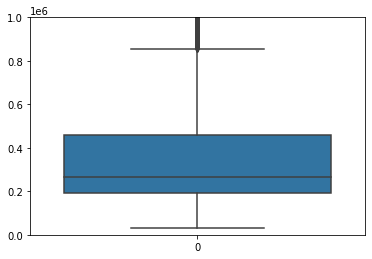

In [9]:
sns.boxplot(data = pivot_table['mean'])
plt.ylim(0, 1000000)

In [10]:
type(pivot_table['date_mutation'][0])

str

In [11]:
import plotly.express as px

In [24]:
fig = px.line(pivot_table, x='date_mutation', y='mean', animation_frame =  'code_departement', color = 'code_departement', title='Price change during time/department')
fig.update_layout(yaxis_range=[0,5000000])
fig.show()

In [13]:
pivot_table

,date_mutation,code_departement,mean,std
0,2019-01-02,75,4.329888e+05,3.401867e+05
1,2019-01-02,77,1.861208e+05,8.576228e+04
2,2019-01-02,78,2.139786e+05,1.552223e+05
3,2019-01-02,91,1.384500e+05,6.443621e+04
4,2019-01-02,92,2.752500e+05,1.076831e+05
...,...,...,...,...
8320,2022-06-30,91,2.804936e+05,2.043856e+05
8321,2022-06-30,92,1.200905e+06,1.761114e+06
8322,2022-06-30,93,3.000884e+05,2.181045e+05
8323,2022-06-30,94,3.830944e+05,3.599480e+05


In [14]:
pivot_table['year'] = pd.DatetimeIndex(pivot_table['date_mutation']).year

In [15]:
pivot_table

,date_mutation,code_departement,mean,std,year
0,2019-01-02,75,4.329888e+05,3.401867e+05,2019
1,2019-01-02,77,1.861208e+05,8.576228e+04,2019
2,2019-01-02,78,2.139786e+05,1.552223e+05,2019
3,2019-01-02,91,1.384500e+05,6.443621e+04,2019
4,2019-01-02,92,2.752500e+05,1.076831e+05,2019
...,...,...,...,...,...
8320,2022-06-30,91,2.804936e+05,2.043856e+05,2022
8321,2022-06-30,92,1.200905e+06,1.761114e+06,2022
8322,2022-06-30,93,3.000884e+05,2.181045e+05,2022
8323,2022-06-30,94,3.830944e+05,3.599480e+05,2022


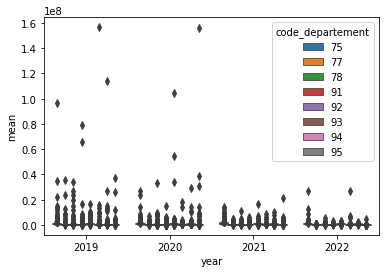

In [17]:
ax = sns.boxplot(data = pivot_table, x="year", y="mean", hue="code_departement")  # RUN PLOT   
plt.show()

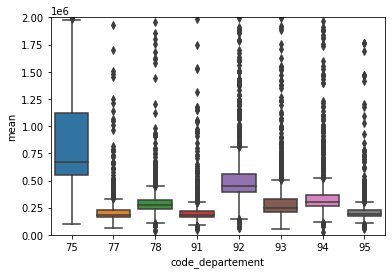

In [28]:
ax = sns.boxplot(data = pivot_table, x="code_departement", y="mean")
plt.ylim(0, 2000000) 
plt.show()

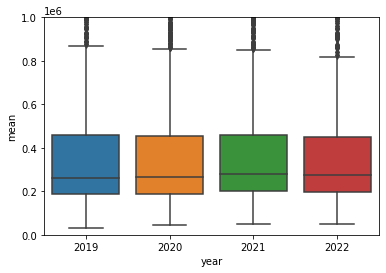

In [32]:
ax = sns.boxplot(data = pivot_table, x="year", y="mean")
plt.ylim(0, 1000000) 
plt.show()

<AxesSubplot: xlabel='year', ylabel='mean'>

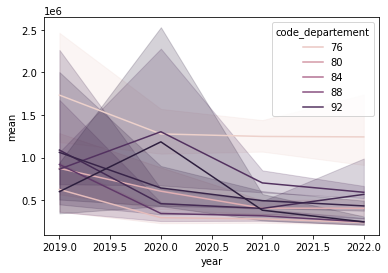

In [22]:
sns.lineplot(data = pivot_table, x = "year", y="mean", hue="code_departement")

In [ ]:
#TODO check house/apartmentxprice
#TODO check natureXprice
#TODO analyse the new column:
#create a new column = price per m2
# df_final['price_m2'] = df_final['valeur_fonciere']/df_final['surface_reelle_bati']

##2) The model

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix #, plot_confusion_matrix

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#we will use supervised ML linear regression models to predict house prices
#we want to know if a house is to be sold with specific characteristics, what will the price be

In [ ]:
#First check correlations between variables
corr = df_final.corr()
sns.heatmap(corr)

In [ ]:
!pip install dython

In [ ]:
from dython.nominal import associations

In [ ]:
# associations(df_final, figsize=(15,15)) #took too much memory and did not work

In [ ]:
# create dummies for type_local	and nature_mutation:

In [20]:
df_dummies1 = pd.concat([df_final , df_final['type_local'].str.get_dummies()], 
          axis = 1)
df_dummies2 = pd.concat([df_dummies1 , df_dummies1['nature_mutation'].str.get_dummies()], 
          axis = 1)

In [22]:
df_dummies2.isna().sum() #valeur_fonciere  = 7269
df_dummies2.dropna(subset='valeur_fonciere', inplace = True)

In [24]:
df_dummies2['code_commune_fact']  = pd. factorize(df_dummies2['code_commune'] )[0]

In [29]:
df_dummies2['price_m2'] = df_dummies2['valeur_fonciere']/df_dummies2['surface_reelle_bati']

In [30]:
df_dummies2.columns

Index(['id_mutation', 'valeur_fonciere', 'surface_reelle_bati',
       'nombre_pieces_principales', 'type_local', 'nature_mutation',
       'nom_commune', 'code_commune', 'code_departement', 'id_parcelle',
       'longitude', 'latitude', 'date_mutation', 'Appartement',
       'Local industriel. commercial ou assimilé', 'Maison', 'Adjudication',
       'Echange', 'Expropriation', 'Vente',
       'Vente en l'état futur d'achèvement', 'Vente terrain à bâtir',
       'code_commune_fact', 'price_m2'],
      dtype='object')

In [34]:
# Train-test-split
X = df_dummies2[['price_m2', 'surface_reelle_bati', 'nombre_pieces_principales', 'Appartement',
       'Local industriel. commercial ou assimilé', 'Maison', 'Adjudication',
       'Echange', 'Expropriation', 'Vente',
       'Vente en l\'état futur d\'achèvement', 'Vente terrain à bâtir',
       'Appartement', 'Local industriel. commercial ou assimilé', 'Maison',
       'Adjudication', 'Echange', 'Expropriation', 'Vente',
       'Vente en l\'état futur d\'achèvement', 'Vente terrain à bâtir', 'code_commune_fact']]
y = df_dummies2['valeur_fonciere']

# We set the size of the train set to 75%. And the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 817036
The length of the train dataset is   : 612777
The length of the test dataset is    : 204259


In [ ]:
#models to test:
#linear regression: LinearRegression()
#Ridge: Ridge()
#lasso: Lasso()
#ElasticNet: ElasticNet()

In [35]:
#pipeline for linear regression
scalers = [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()]

def pipes(x):
    pipe = Pipeline([('scaler', x), ('neigh', LinearRegression())])
    pipe.fit(X_train, y_train)
    return pipe.score(X_train, y_train), pipe.score(X_test, y_test), x

print(list(map(pipes, scalers)))



[(0.2479902578937091, 0.12605152946956544, StandardScaler()), (0.24799344136179546, 0.12615825664796987, MaxAbsScaler()), (0.24799344136179535, 0.12615825664796998, MinMaxScaler()), (0.24799344136179546, 0.12615825664796987, RobustScaler())]


In [36]:
#pipeline for ridge
scalers = [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()]

def pipes(x):
    pipe = Pipeline([('scaler', x), ('neigh', Ridge())])
    pipe.fit(X_train, y_train)
    return pipe.score(X_train, y_train), pipe.score(X_test, y_test), x

print(list(map(pipes, scalers)))

[(0.24799344136114188, 0.12615880492026277, StandardScaler()), (0.24334675795493643, 0.16423120764079502, MaxAbsScaler()), (0.24334675832314068, 0.16423120739054176, MinMaxScaler()), (0.24799344105612142, 0.1261583350677019, RobustScaler())]


In [37]:
#pipeline for Lasso
scalers = [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()]

def pipes(x):
    pipe = Pipeline([('scaler', x), ('neigh', Lasso())])
    pipe.fit(X_train, y_train)
    return pipe.score(X_train, y_train), pipe.score(X_test, y_test), x

print(list(map(pipes, scalers)))

KeyboardInterrupt: ignored

In [38]:
#pipeline for ElasticNet
scalers = [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()]

def pipes(x):
    pipe = Pipeline([('scaler', x), ('neigh', ElasticNet())])
    pipe.fit(X_train, y_train)
    return pipe.score(X_train, y_train), pipe.score(X_test, y_test), x

print(list(map(pipes, scalers)))

[(0.2213782139937942, 0.18717884842857868, StandardScaler()), (0.008942316501856618, 0.008960476877956758, MaxAbsScaler()), (0.008942316505019088, 0.008960476880145452, MinMaxScaler()), (0.24603289177431964, 0.1224062221226454, RobustScaler())]


In [46]:
#trying one nweighbooh or 2
dft1 = df_dummies2[df_dummies2["code_departement"]== 93]


In [44]:
# Train-test-split
X = dft1[['price_m2', 'surface_reelle_bati', 'nombre_pieces_principales', 'Appartement',
       'Local industriel. commercial ou assimilé', 'Maison', 'Adjudication',
       'Echange', 'Expropriation', 'Vente',
       'Vente en l\'état futur d\'achèvement', 'Vente terrain à bâtir',
       'Appartement', 'Local industriel. commercial ou assimilé', 'Maison',
       'Adjudication', 'Echange', 'Expropriation', 'Vente',
       'Vente en l\'état futur d\'achèvement', 'Vente terrain à bâtir', 'code_commune_fact']]
y = dft1['valeur_fonciere']

# We set the size of the train set to 75%. And the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 160976
The length of the train dataset is   : 120732
The length of the test dataset is    : 40244


In [47]:
#pipeline for linear regression
scalers = [StandardScaler(), MaxAbsScaler(), MinMaxScaler(), RobustScaler()]

def pipes(x):
    pipe = Pipeline([('scaler', x), ('neigh', LinearRegression())])
    pipe.fit(X_train, y_train)
    return pipe.score(X_train, y_train), pipe.score(X_test, y_test), x

print(list(map(pipes, scalers)))


[(0.2571866582437975, 0.33404287816909195, StandardScaler()), (0.25718665480462255, 0.33404322127330655, MaxAbsScaler()), (0.2571866548046229, 0.33404322127330655, MinMaxScaler()), (0.25718665480462277, 0.3340432212733032, RobustScaler())]
